# Carregando os Dados

In [1]:
import pandas as pd

In [2]:
!wget https://archive.ics.uci.edu/static/public/602/dry+bean+dataset.zip

--2023-10-11 15:22:27--  https://archive.ics.uci.edu/static/public/602/dry+bean+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dry+bean+dataset.zip’

dry+bean+dataset.zi     [  <=>               ]   4.52M  18.6MB/s    in 0.2s    

2023-10-11 15:22:27 (18.6 MB/s) - ‘dry+bean+dataset.zip’ saved [4738776]



In [3]:
!unzip dry+bean+dataset.zip

Archive:  dry+bean+dataset.zip
   creating: DryBeanDataset/
  inflating: DryBeanDataset/Dry_Bean_Dataset.arff  
  inflating: DryBeanDataset/Dry_Bean_Dataset.txt  
  inflating: DryBeanDataset/Dry_Bean_Dataset.xlsx  


In [4]:
%cd DryBeanDataset/

/content/DryBeanDataset


In [5]:
%ls

Dry_Bean_Dataset.arff  Dry_Bean_Dataset.txt  Dry_Bean_Dataset.xlsx


In [6]:
df = pd.read_excel("Dry_Bean_Dataset.xlsx")

In [7]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

# Análise dos dados

In [9]:
import numpy as np
import seaborn as sns

## Distribuição de dados da variável alvo de predição

In [10]:
df['Class'].value_counts(normalize=True)

DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: Class, dtype: float64

## Correlação entre as features

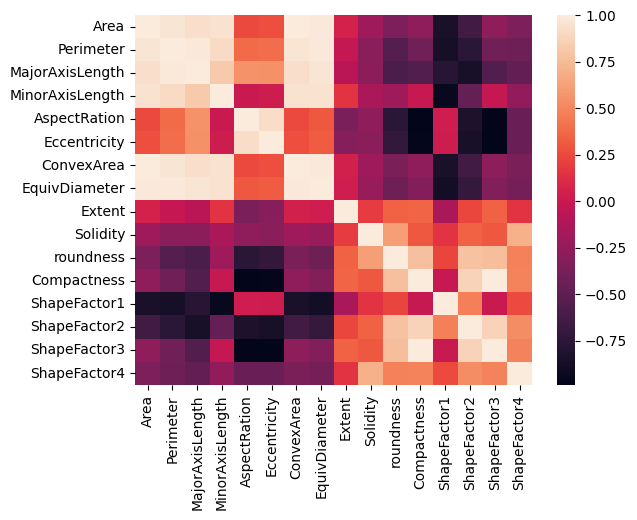

In [11]:
sns.heatmap(df[[col for col in df.columns if col != 'Class']].corr());

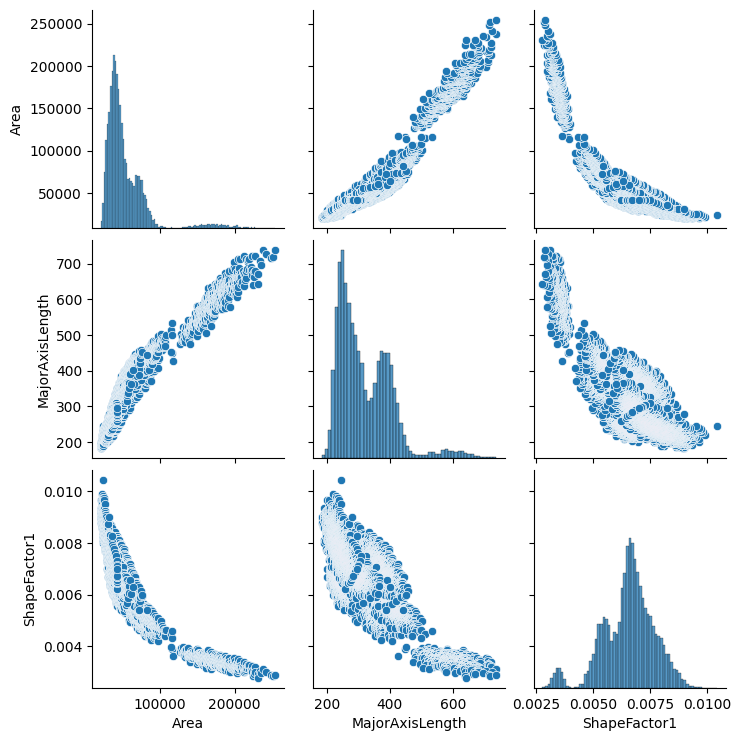

In [12]:
sns.pairplot(df[['Area', 'MajorAxisLength', 'ShapeFactor1', ]]);

## Redução de dimensionalidade para visualização em 2D dos dados

In [13]:
%pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=e21a64dfcc7a00a682cd06bc2081b97680822c0d308b941aa0dcfd8e31756ed4
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=4f9bed589bf44bb4f1166222487617803ae8f6c48e325a8d318e25432e19ba3f
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [14]:
import umap
from sklearn.preprocessing import StandardScaler

In [15]:
df_data = df[[col for col in df.columns if col != 'Class']].values
df_scaled = StandardScaler().fit_transform(df_data)

In [16]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(df_scaled)
embedding.shape

(13611, 2)

In [17]:
embedding

array([[ 9.746183 , 14.288389 ],
       [10.094583 , 15.706122 ],
       [ 9.79692  , 14.334575 ],
       ...,
       [12.740804 ,  4.9131384],
       [12.177527 ,  3.7245932],
       [14.60462  ,  4.1416535]], dtype=float32)

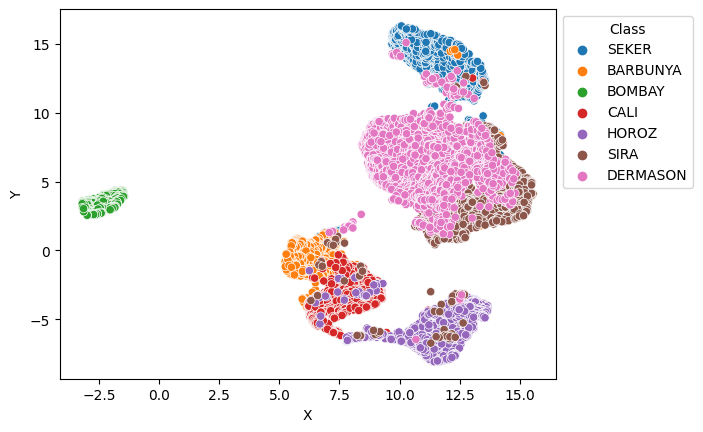

In [18]:
df['X'] = embedding[:, 0]
df['Y'] = embedding[:, 1]
ax = sns.scatterplot(data=df, x="X", y="Y", hue='Class')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Modelos de Aprendizado de Máquina

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

Preparação dos dados

In [19]:
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
            'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
            'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
            'ShapeFactor3', 'ShapeFactor4']
target = 'Class'

In [20]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class', 'X', 'Y'],
      dtype='object')

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.15, random_state=424242)

## Árvore de Decisão

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.86      0.91      0.88       201
      BOMBAY       1.00      0.99      0.99        85
        CALI       0.93      0.90      0.91       252
    DERMASON       0.91      0.88      0.90       535
       HOROZ       0.93      0.94      0.93       310
       SEKER       0.91      0.95      0.93       303
        SIRA       0.82      0.82      0.82       356

    accuracy                           0.90      2042
   macro avg       0.91      0.91      0.91      2042
weighted avg       0.90      0.90      0.90      2042



## Floresta Aleatória

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
clf_rf = RandomForestClassifier()
clf_rf = clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.94      0.93       201
      BOMBAY       1.00      0.99      0.99        85
        CALI       0.96      0.92      0.94       252
    DERMASON       0.91      0.92      0.92       535
       HOROZ       0.96      0.95      0.96       310
       SEKER       0.93      0.95      0.94       303
        SIRA       0.86      0.87      0.86       356

    accuracy                           0.93      2042
   macro avg       0.94      0.93      0.94      2042
weighted avg       0.93      0.93      0.93      2042



## XGBoost

In [41]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [71]:
le = LabelEncoder()
y_trainLE = le.fit_transform(y_train)

In [72]:
clf_xgb = XGBClassifier()
clf_xgb = clf_xgb.fit(X_train, y_trainLE)
y_pred = clf_xgb.predict(X_test)

In [73]:
y_pred = le.inverse_transform(y_pred)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.96      0.96       201
      BOMBAY       1.00      1.00      1.00        85
        CALI       0.98      0.95      0.96       252
    DERMASON       0.91      0.92      0.92       535
       HOROZ       0.96      0.97      0.97       310
       SEKER       0.94      0.96      0.95       303
        SIRA       0.86      0.86      0.86       356

    accuracy                           0.93      2042
   macro avg       0.94      0.94      0.94      2042
weighted avg       0.93      0.93      0.93      2042



## Redes Neurais Artificiais (Multilayer Perceptron)

In [47]:
from sklearn.neural_network import MLPClassifier

In [76]:
mlp_scaler = StandardScaler()
X_train_mlp = mlp_scaler.fit_transform(X_train)
X_test_mlp = mlp_scaler.transform(X_test)

In [78]:
clf_mlp = MLPClassifier(random_state=1, max_iter=500)
clf_mlp = clf_mlp.fit(X_train_mlp, y_train)
y_pred = clf_mlp.predict(X_test_mlp)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.94      0.94       201
      BOMBAY       1.00      1.00      1.00        85
        CALI       0.96      0.95      0.95       252
    DERMASON       0.91      0.94      0.93       535
       HOROZ       0.96      0.95      0.96       310
       SEKER       0.96      0.96      0.96       303
        SIRA       0.89      0.87      0.88       356

    accuracy                           0.94      2042
   macro avg       0.95      0.94      0.95      2042
weighted avg       0.94      0.94      0.94      2042

